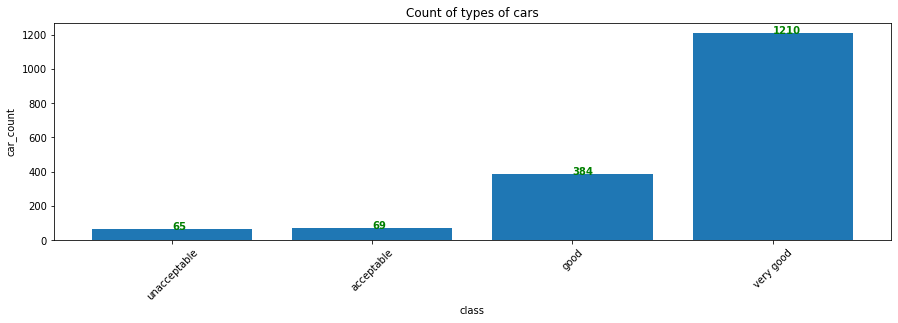

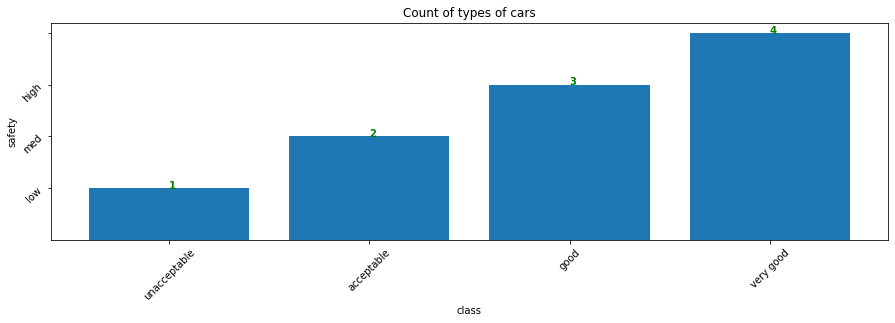

In [1]:
"""
Enrollement no : MT21MCS013 Jay 
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv(r"https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", names = ["buying","maint", "doors", "persons", "lug_boot","safety","class"])
#visualisation
#histogram
class_def=[]
for row in df['class']:
    if row =='unacc':
        class_def.append('unacceptable')
    elif row == 'acc':
        class_def.append('acceptable')
    elif row == 'good':
        class_def.append('good')
    elif row == 'vgood':
        class_def.append('very good')
    else:
        class_def.append('Failed')
df['class_def'] = class_def
car_count=pd.value_counts(df['class_def'].values, sort=False)


Index = [1,2,3,4]
plt.figure(figsize=(15,4))
plt.bar(Index,car_count,color = 'blue')
plt.xticks(Index,['unacceptable','acceptable','good','very good'],rotation=45)
plt.ylabel('car_count')
plt.xlabel('class')
plt.title('Count of types of cars')
plt.bar(Index, car_count)
for a,b in zip(Index, car_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')
plt.show()


Index = [1,2,3,4]
Index1=[1,2,3,4]
plt.figure(figsize=(15,4))
plt.bar(Index,Index,color = 'red')
plt.xticks(Index,['unacceptable','acceptable','good','very good'],rotation=45)
plt.yticks(Index1,['low','med','high'],rotation=45)
plt.xlabel('class')
plt.ylabel('safety')
plt.title('Count of types of cars')
plt.bar(Index, Index1)
for a,b in zip(Index,Index1):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')
plt.show()




#pre+processing

cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1} }
df.replace(cleanup_nums,inplace = True)


target = df['class']
df.drop( ['class'],axis = 1,inplace = True)



df = pd.get_dummies(df)


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df,target,random_state = 0)


from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)



from sklearn import svm
from sklearn.svm import SVC
svc = svm.SVC(kernel='linear', C=1).fit(X_train_std,Y_train)
from sklearn.metrics import accuracy_score
s_pred=svc.predict(X_test_std)
